# Preliminaries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sys.path.append("/Users/paolo/Documents/methods/CMI_FS")
from feature_selection import forwardFeatureSelection

sys.path.append("/Users/paolo/Documents/methods/LinCFA")
from LinCFA import LinCFA

sys.path.append("/Users/paolo/Documents/Droughts/Paolo/regression_LinCFA")
from aux import standardize,unfold_dataset,compute_r2,prepare_target,prepare_features,aggregate_unfolded_data,FS_with_linearWrapper,compare_methods


In [3]:
def plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5):
    x = []
    y = []
    colors = cm.rainbow(np.linspace(0,1,len(output)))
    np.random.shuffle(colors)
    fig, ax = plt.subplots(2)
    ax[0].set_xlim(xmin,xmax)
    ax[1].set_xlim(xmin,xmax)
    ax[0].set_ylim(ymin,ymax)
    ax[1].set_ylim(ymin,ymax)
    for i in range(len(output)): 
        #print(len(output[i]))
        x = []
        y = []
        
        for datum in output[i]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[0].scatter(x,y,color=colors[i])
    
    x = []
    y = []
    col = cm.rainbow(np.linspace(0,1,len(selected_colnames)))
    for i in range(len(selected_colnames)): 
        idx = int(selected_colnames[i].split('_')[-1])
        for datum in output[idx]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[1].scatter(x,y,color=col[i])
    

In [4]:
### Nota: devo standardizzare tutto prima di chiamare LinCFA ma non serve validare
# infatti il metodo usa i dati per stimare i pesi della regressione lineare
# anche per CMI_FS non serve validare, usa i dati per quantificare l'informazione condivisa col target

# Target 

target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))


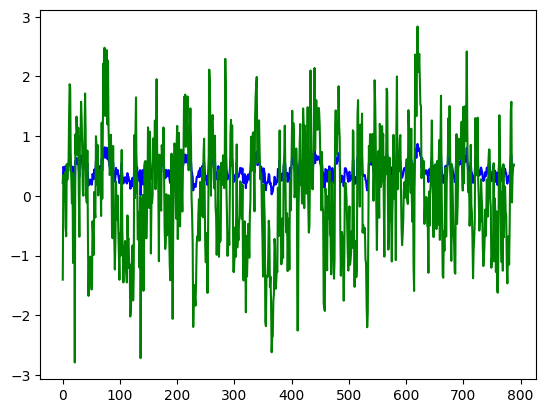

In [5]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')
plt.plot(target_df_trainVal.loc[:,'mean'], color='blue')
plt.plot(target_df_trainVal.loc[:,'mean_std'], color='green')

# 1) Only contemporary week: temperature, precipitation, both

## temperature

### full data

In [6]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg'],target_df_trainVal)
aggregate_trainVal

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 40)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 130

Number of aggregated features: 42

actual training score: 0.15021220690534776
actual validation score: 0.22666169580213957, number of remaining columns: 40

actual training score: 0.1503657721291638
actual 

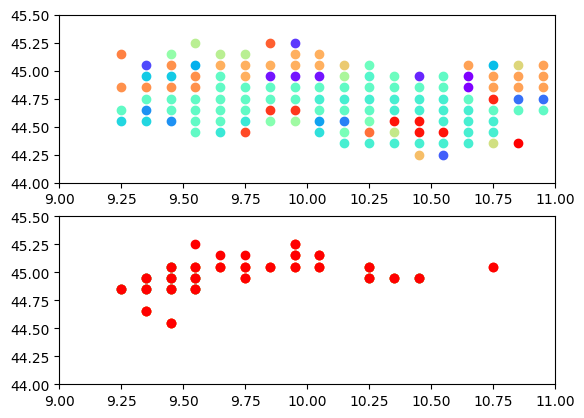

In [8]:
plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5)

### not considering last years

In [9]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 40, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 130

Number of aggregated features: 41

actual training score: 0.12975229033898483
actual validation score: 0.20771107481469742, number of remaining columns: 39

actual training score: 0.14430122888227004
actual

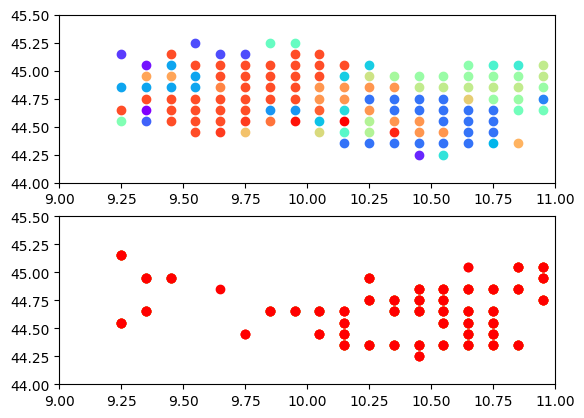

In [10]:
plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5)

### repeat both with CMI FS

In [11]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg'],target_df_trainVal)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 130

Number of aggregated features: 42

----- MI Scores -----
[(16, 0.1410706468750247), (36, 0.14076762013064556), (3, 0.13732920520146047), (13, 0.13369491633190958), (35, 0.12990408752898933), (22, 0.12985955

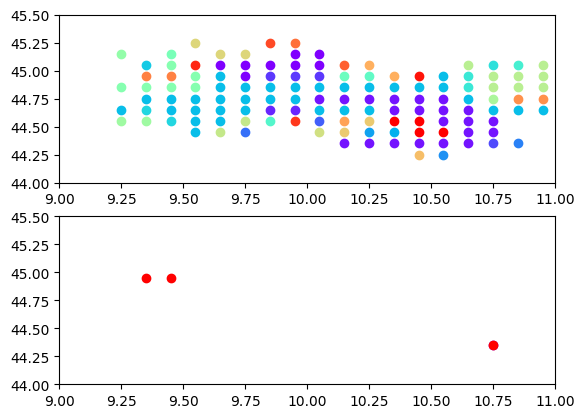

In [12]:
plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5)

In [13]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
#    "accuracy" : [] # list of scores associated with the reduced problem
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)



target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 130

Number of aggregated features: 41

----- MI Scores -----
[(1, 0.13505461083647102), (17, 0.1336253951612861), (22, 0.13292394575475824), (35, 0.1314947303492075), (13, 0.13043798808455945), (2, 0.1245563073

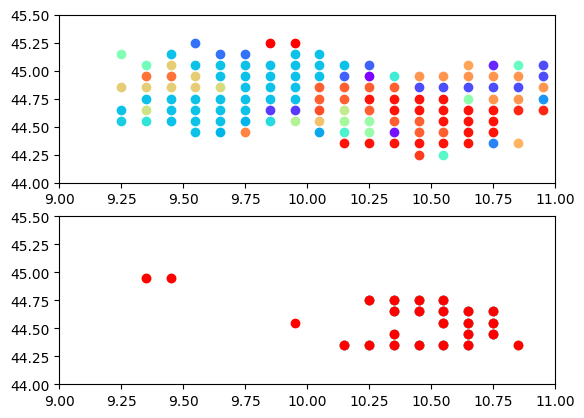

In [14]:
plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5)

## precipitation

### full data

In [20]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr'],target_df_trainVal)
aggregate_trainVal

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 24)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 130

Number of aggregated features: 24

actual training score: 0.061977016717275624
actual validation score: 0.027002468156388848, number of remaining columns: 22

actual training score: 0.062498400642367336
act

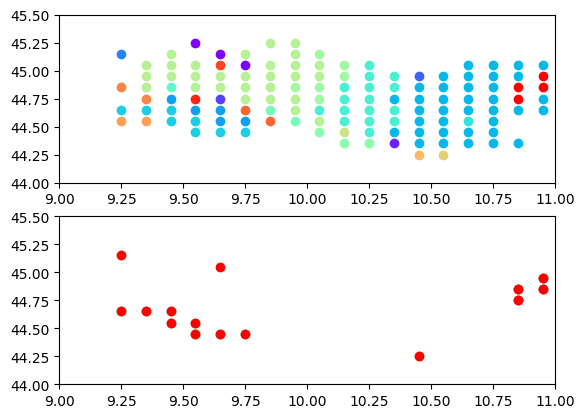

In [21]:
plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5)

1
4
6
7
10
11
12
14
15
actual training score: 0.061977016717275624
actual validation score: 0.027002468156388848, number of remaining columns: 7

actual training score: 0.06390015128439308
actual validation score: 0.020719980185504805, number of remaining columns: 6

actual training score: 0.08004315522187366
actual validation score: 0.013934733212647266, number of remaining columns: 5

actual training score: 0.08083872183345442
actual validation score: 0.023500532814437203, number of remaining columns: 4

actual training score: 0.08109949177559139
actual validation score: 0.021765530013949652, number of remaining columns: 3

actual training score: 0.08118393900317644
actual validation score: 0.01948443901315111, number of remaining columns: 2

actual training score: 0.0820512618368412
actual validation score: 0.02045882895150919, number of remaining columns: 1



selected columns: ['cyclostationary_mean_rr_10', 'cyclostationary_mean_rr_11'], 

validation score: 0.027002468156388848, 


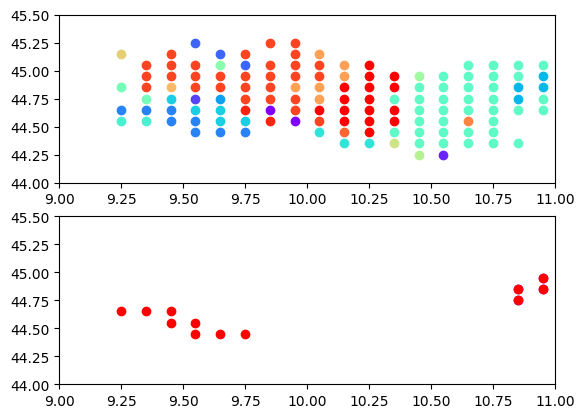

In [22]:
### repeat keeping features with at least three cells
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal.iloc[:,ii], target_df_train, target_df_val, 7)

compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames)

plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5)

### not considering last years

In [31]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')
aggregate_trainVal

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 40, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 130

Number of aggregated features: 28

actual training score: 0.06415152117647915
actual validation score: -0.0036380807623193068, number of remaining columns: 26

actual training score: 0.0676658096905357
actu

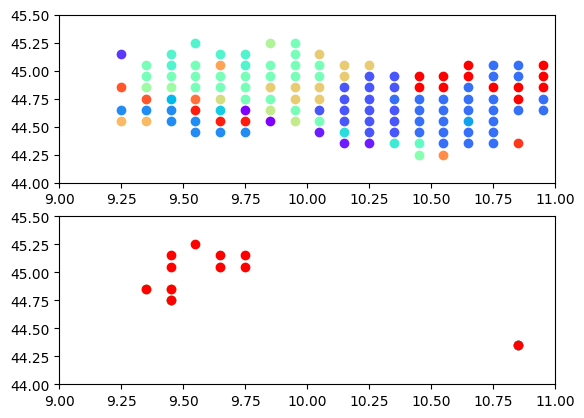

In [32]:
plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5)

In [33]:
### repeat keeping features with at least three cells and excluding last years
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal.iloc[:,ii], target_df_train, target_df_val, 8, 228)

compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames)

plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5)

2
3
5
7
8
12
13
15
16
actual training score: 0.08708181528395831
actual validation score: -0.0015904765398750964, number of remaining columns: 7

actual training score: 0.0870820046192361
actual validation score: -0.0015708093055282202, number of remaining columns: 6

actual training score: 0.09154052181501993
actual validation score: -0.009719714401499102, number of remaining columns: 5

actual training score: 0.09360131914938641
actual validation score: -0.014275225692907734, number of remaining columns: 4

actual training score: 0.09491058117026785
actual validation score: -0.023714737869262814, number of remaining columns: 3

actual training score: 0.09874837628251398
actual validation score: -0.030180640894774013, number of remaining columns: 2

actual training score: 0.11175205649833941
actual validation score: -0.06051477883748979, number of remaining columns: 1

actual training score: 0.11466645108006424
actual validation score: -0.07381714850919141, number of remaining columns

ValueError: at least one array or dtype is required

### repeat both with CMI FS

In [34]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr'],target_df_trainVal)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 130

Number of aggregated features: 24

----- MI Scores -----
[(6, 0.0810426364674863), (1, 0.0796161003685054), (9, 0.06522322546028174), (8, 0.0652097565049519), (11, 0.06409057231982955), (0, 0.05875985324849

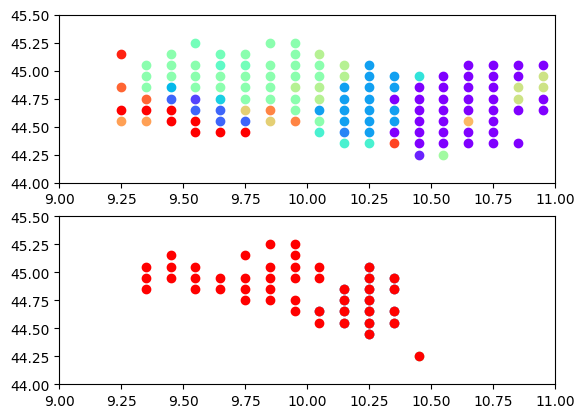

In [35]:
plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5)

1
4
6
7
10
11
12
14
15
----- MI Scores -----
[(2, 0.0810426364674863), (0, 0.0796161003685054), (5, 0.06409057231982955), (1, 0.05410973188860993), (7, 0.04926706180037885), (8, 0.04550060500817015), (4, 0.030963161550719612), (6, 0.030336376023352596), (3, 0.016576282459283394)]
Best MI score: 0.0810426364674863
Adding first best original feature: 2
Highest CMI score: -0.0035419734953241744

[2]

Full aggregate regression train score: 0.07638988503349675, test score: 0.08072355756736116
Aggregate regression train score with FS: 0.046918741066045766, test score: 0.05344336800246241


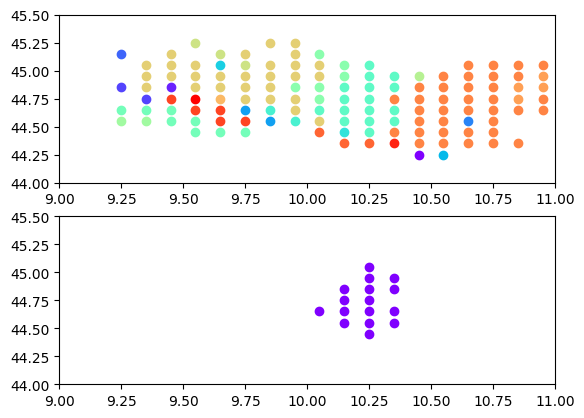

In [36]:
### repeat keeping features with at least three cells
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
#    "accuracy" : [] # list of scores associated with the reduced problem
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal.iloc[:,ii]),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.iloc[:,ii].columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames)

plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5)

In [37]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
#    "accuracy" : [] # list of scores associated with the reduced problem
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)



target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 130

Number of aggregated features: 28

----- MI Scores -----
[(2, 0.08830413469347519), (11, 0.08551713286237457), (7, 0.08318729936411873), (9, 0.08252158915719636), (0, 0.07919816591699666), (4, 0.07326593931

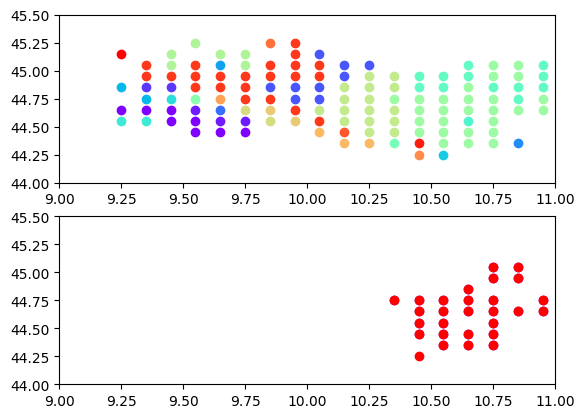

In [38]:
plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5)

In [39]:
### repeat keeping features with at least three cells and excluding last years
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal.iloc[:,ii]),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.iloc[:,ii].columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames)


2
3
5
7
8
12
13
15
16
----- MI Scores -----
[(0, 0.08830413469347519), (3, 0.08318729936411873), (5, 0.07085772998788138), (6, 0.07057853400969465), (2, 0.05682607547322715), (7, 0.0474663158170742), (1, 0.039325001748386344), (8, 0.032090482723311387), (4, 0.025932763785423512)]
Best MI score: 0.08830413469347519
Adding first best original feature: 0
CMI: 0.005759136554803701
Highest CMI score: 0.005759136554803701
Adding original feature: 2
CMI: 0.0052581796322099805
CMI: 0.00390404493388416
Highest CMI score: 0.0052581796322099805
Adding original feature: 3
Highest CMI score: -0.0014010607255527385

[0, 2, 3]

Full aggregate regression train score: 0.08671049638755246, test score: 0.06939964284961408
Aggregate regression train score with FS: 0.08149174973643025, test score: 0.08048535543583901


## temperature and precipitation

### full data

In [40]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg','cyclostationary_mean_rr'],target_df_trainVal)
aggregate_trainVal

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 60)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 130

Number of aggregated features: 42

Number of features: 130

Number of aggregated features: 24

actual training score: 0.15021220690534776
actual validation score: 0.22666169580213957, number of remaining co

In [41]:
### repeat keeping features with at least three cells
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal.iloc[:,ii], target_df_train, target_df_val, 8)

compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames)


1
4
6
7
10
11
12
14
15
actual training score: 0.09302724082225322
actual validation score: 0.21406768690867695, number of remaining columns: 7

actual training score: 0.09655619626663292
actual validation score: 0.2580912074424425, number of remaining columns: 6

actual training score: 0.10309580937072749
actual validation score: 0.2746696852073829, number of remaining columns: 5

actual training score: 0.10727424356583537
actual validation score: 0.2514472022161821, number of remaining columns: 4

actual training score: 0.1366134263959009
actual validation score: 0.2668566494850666, number of remaining columns: 3

actual training score: 0.15466539944648106
actual validation score: 0.26815543871510017, number of remaining columns: 2

actual training score: 0.15819856656459752
actual validation score: 0.2893005138859651, number of remaining columns: 1

actual training score: 0.15858512072380526
actual validation score: 0.28404897892635417, number of remaining columns: 0



selected colu

In [22]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg','cyclostationary_mean_rr'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')
aggregate_trainVal

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 40, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 130

Number of aggregated features: 41

Number of features: 130

Number of aggregated features: 28

actual training score: 0.12975229033898483
actual validation score: 0.20771107481469742, number of remaining co

### not considering last years

In [42]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg','cyclostationary_mean_rr'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 40, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 130

Number of aggregated features: 41

Number of features: 130

Number of aggregated features: 28

actual training score: 0.12975229033898483
actual validation score: 0.20771107481469742, number of remaining co

In [45]:
### repeat keeping features with at least three cells and excluding last years
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal.iloc[:,ii], target_df_train, target_df_val, 7, 228)

compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames)


2
3
5
7
8
12
13
15
16
actual training score: 0.09512307819589927
actual validation score: 0.12859610660974685, number of remaining columns: 7

actual training score: 0.10196580752668927
actual validation score: 0.16402159090972313, number of remaining columns: 6

actual training score: 0.13534518994378308
actual validation score: 0.16808581594878957, number of remaining columns: 5

actual training score: 0.1362156127797537
actual validation score: 0.16991831456528772, number of remaining columns: 4

actual training score: 0.13639839440095047
actual validation score: 0.17567176479420843, number of remaining columns: 3

actual training score: 0.13777609841287253
actual validation score: 0.16192835805641226, number of remaining columns: 2

actual training score: 0.14116051145049557
actual validation score: 0.13797822018173977, number of remaining columns: 1



selected columns: ['cyclostationary_mean_tg_2', 'cyclostationary_mean_tg_7', 'cyclostationary_mean_tg_16', 'cyclostationary_mean_t

### repeat both with CMI FS

In [46]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg','cyclostationary_mean_rr'],target_df_trainVal)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 130

Number of aggregated features: 42

Number of features: 130

Number of aggregated features: 24

----- MI Scores -----
[(16, 0.1410706468750247), (36, 0.14076762013064556), (3, 0.13732920520146047), (13, 0.13

In [48]:
### repeat keeping features with at least three cells
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
#    "accuracy" : [] # list of scores associated with the reduced problem
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal.iloc[:,ii]),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.iloc[:,ii].columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames)


1
4
6
7
10
11
12
14
15
----- MI Scores -----
[(4, 0.12411805727993833), (0, 0.12381066696070472), (3, 0.09631917723714903), (2, 0.09170749801802068), (6, 0.08189945008886394), (5, 0.07728672487421455), (8, 0.0749514780242302), (7, 0.07277371050492143), (1, 0.061168529124984654)]
Best MI score: 0.12411805727993833
Adding first best original feature: 4
CMI: 0.016291719034924018
Highest CMI score: 0.016291719034924018
Adding original feature: 0
Highest CMI score: -0.009051767589276616

[4, 0]

Full aggregate regression train score: 0.19279059134795407, test score: 0.04167228395645395
Aggregate regression train score with FS: 0.1570951094599038, test score: 0.054613935388929225


In [49]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/Emiliani2_aggreg.csv'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg','cyclostationary_mean_rr'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
#    "accuracy" : [] # list of scores associated with the reduced problem
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)



target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 130

Number of aggregated features: 41

Number of features: 130

Number of aggregated features: 28

----- MI Scores -----
[(1, 0.13505461083647102), (17, 0.1336253951612861), (22, 0.13292394575475824), (35, 0.13

In [50]:
### repeat keeping features with at least three cells and excluding last years
ii = []
for i in range(len(output)):
    if (len(output[i]))>=3: 
        print(i)
        ii.append(i)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal.iloc[:,ii]),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.iloc[:,ii].columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal.iloc[:,ii], aggregate_test.iloc[:,ii], target_df_trainVal, target_df_test, selected_colnames)


2
3
5
7
8
12
13
15
16
----- MI Scores -----
[(6, 0.13043798808455945), (0, 0.12455630733277606), (2, 0.11013559411702513), (7, 0.10933694055031372), (3, 0.09716249084528307), (1, 0.09501019884305828), (4, 0.0946340510559481), (8, 0.0892798383541589), (5, 0.06154465928566862)]
Best MI score: 0.13043798808455945
Adding first best original feature: 6
CMI: 0.006556653916673344
Highest CMI score: 0.006556653916673344
Adding original feature: 0
Highest CMI score: -0.013218434537931145

[6, 0]

Full aggregate regression train score: 0.17916225084513981, test score: 0.157827183474043
Aggregate regression train score with FS: 0.12548475520123714, test score: 0.12058275757076253


## 

### tests:
full data: max_train='2013-11-22', max_val='2018-04-10', max_test='2022-06-24'<br>
without last years: max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01'<br>
<br>
### temperature:
130 original features --> 42 aggregations with neighbours --> 11 wrapper FS<br>
train score:0.2184, validation score: 0.32, test score: 0.018<br>
<br>
Without last years: 41 aggregations with neighbours --> 21 wrapper FS<br>
train score:0.247, validation score: 0.28, test score: 0.23<br>

### precipitation:
130 original features --> 24 aggregations with neighbours --> 5 wrapper FS<br>
train score:0.066, validation score: 0.039, test score: 0.065<br>
<br>
Without last years: 28 aggregations with neighbours --> 5 wrapper FS<br>
train score:0.0727, validation score: 0.010, test score: 0.058<br>

### both:
130+130 original features --> 42+24 aggregations with neighbours --> 24 wrapper FS<br>
train score:0.2358, validation score: 0.329, test score: 0.019<br>
<br>
Without last years: 41+28 aggregations with neighbours --> 29 wrapper FS<br>
train score:0.264, validation score: 0.29, test score: 0.186<br>


In [51]:
### da provare: altro metodo, modelli più avanzati